1. Cities in Sweden.

In [51]:
# A. Print out all the cities
import pandas as pd

df = pd.DataFrame({'Kommun': ['Malmö', 'Stockholm', 'Uppsala', 'Göteborg'],
      'Population': [347949, 975551, 233839, 583056]})
print(df['Kommun'])

0        Malmö
1    Stockholm
2      Uppsala
3     Göteborg
Name: Kommun, dtype: object


In [52]:
# B. Select only the row which contains Göteborg
df.loc[df['Kommun'] == 'Göteborg']

,Kommun,Population
3,Göteborg,583056


In [53]:
# C. Sort the cities by population from largest to smallest
sorted_df = df.sort_values(by=['Population'], ascending=False).reset_index(drop=True)
sorted_df

,Kommun,Population
0,Stockholm,975551
1,Göteborg,583056
2,Malmö,347949
3,Uppsala,233839


In [62]:
# D. Filter out the three largest cities
sorted_df.head(3)

,Kommun,Population
0,Stockholm,975551
1,Göteborg,583056
2,Malmö,347949


In [63]:
# E. Add new column in sorted DataFrame named: Population(%)
sorted_df['Population(%)'] = (sorted_df['Population']/10379295*100).round(1)
sorted_df

,Kommun,Population,Population(%)
0,Stockholm,975551,9.4
1,Göteborg,583056,5.6
2,Malmö,347949,3.4
3,Uppsala,233839,2.3


2. Cities in Sweden - real dataset

In [56]:
# A, B. Read in and clean data
import pandas as pd

columns = ['Rang 2020', 'Rang 2019', 'Kommun', 'Folkmängd 2020', 'Folkmängd 2019', 'Förändring']
df = pd.read_excel('../Exercises/komtopp50_2020.xlsx', header=[6],names=columns, sheet_name='Totalt')
df.head()

,Rang 2020,Rang 2019,Kommun,Folkmängd 2020,Folkmängd 2019,Förändring
0,83,84,Ale,31868,31402,1.483982
1,64,64,Alingsås,41602,41420,0.439401
2,123,123,Alvesta,20224,20134,0.447005
3,255,255,Aneby,6821,6848,-0.394276
4,169,167,Arboga,14039,14087,-0.340740


In [57]:
# C. Sort the cities by population from largest to smallest
df = df.sort_values(by=['Folkmängd 2020'], ascending=False).reset_index(drop=True)
l_cities = df.head()
l_cities

,Rang 2020,Rang 2019,Kommun,Folkmängd 2020,Folkmängd 2019,Förändring
0,1,1,Stockholm,975551,974073,0.151734
1,2,2,Göteborg,583056,579281,0.651670
2,3,3,Malmö,347949,344166,1.099179
3,4,4,Uppsala,233839,230767,1.331213
4,5,5,Linköping,164616,163051,0.959822


In [58]:
# D. Filter out the five smallest cities
s_cities = df.tail()
s_cities

,Rang 2020,Rang 2019,Kommun,Folkmängd 2020,Folkmängd 2019,Förändring
285,286,286,Åsele,2805,2794,0.393701
286,287,287,Arjeplog,2718,2785,-2.405745
287,288,288,Dorotea,2498,2551,-2.077617
288,289,289,Sorsele,2442,2489,-1.888309
289,290,290,Bjurholm,2387,2408,-0.872093


In [59]:
# E. Use the DataFrame to calculate Sweden's population in 2019 and 2020
print(f'Populationen i Sverige 2020: {df['Folkmängd 2020'].sum()}')
print(f'Populationen i Sverige 2019: {df['Folkmängd 2019'].sum()}')

Populationen i Sverige 2020: 10379295
Populationen i Sverige 2019: 10327589


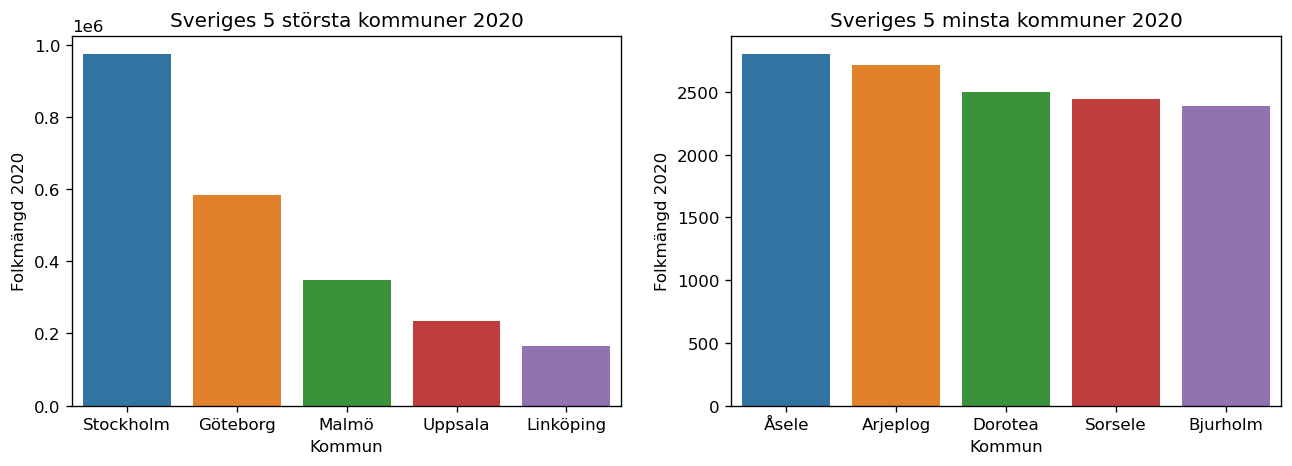

In [60]:
# F. Plot a bar chart for the five largest cities and the five smallest cities
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1,2, dpi=120, figsize=(13,4))
titles = ['Sveriges 5 största kommuner 2020', 'Sveriges 5 minsta kommuner 2020']
data_frames = [l_cities, s_cities]
x_column = ['Kommun', 'Kommun']

for i, (data, title) in enumerate(zip(data_frames, titles)):
    sns.barplot(data = data, x=x_column[i], y='Folkmängd 2020', ax = axes[i], hue='Kommun')
    axes[i].set(title=title)
    #axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90)
plt.show()

3. Cities in Sweden - gender